# Explore Experiment Run Results


In [4]:
from azureml.core import Workspace, run
ws = Workspace.from_config()


exp_name = 'cats-and-dogs'
run_name = 'cats-and-dogs_1649839375_24833096'



In [5]:
from azureml.core import Workspace,Experiment,Run


# get workspace
ws = Workspace.from_config()

# get/create experiment
exp = Experiment(ws, exp_name)

# get run
run = Run(exp, run_name)

# submit script to AML
# RunDetails(run).show()


In [6]:
run.display_name
#run.register_model(model_name='cats_and_dogs', model_path='model')
run.get_metrics().keys()

run.get_metrics()['val_accuracy'][-1]

0.9089999794960022

In [17]:
print(f'validation accuracy: {run.get_metrics()["val_accuracy"][-1]}')
print(f'Experiment Run status: {run.get_details()["status"]}')

validation accuracy: 0.9089999794960022
Experiment Run status: Completed


## Download Model

Download and use the MLflow model artifact

Model artifact is logged by mlflow's autologging, following this format: https://www.tensorflow.org/guide/keras/save_and_serialize#tf_checkpoint_format

In [38]:
from tensorflow import keras
run.download_files('model', output_directory='.logs')
model = keras.models.load_model('.logs/model/data/model') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 500)               2304500   
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 17,019,689
Trainable params: 9,384,425
Non-trainable params: 7,635,264
_________________________________________________________________


In [39]:
print('Number of layers: ', len(model.get_config()['layers']))
print('Model type: ', type(model))

Number of layers:  5
Model type:  <class 'keras.engine.sequential.Sequential'>


To ensure dataset is mounted, run [explore dataset notebook](02_explore_dataset.ipynb). 

[[1.]]


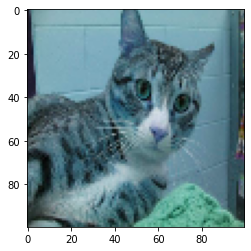

In [40]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_fn = '/mnt/tmp/cats_dogs/validation/cats/cat.2012.jpg'
img_data = open(img_fn, 'rb').read()
img = cv2.imread(img_fn)
img2 = cv2.resize(img, (100,100))
img2.shape

plt.imshow(img2)

print(model.predict(img2.reshape(1,100,100,3)))

[[1.]]


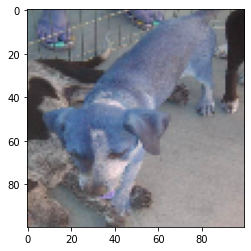

In [41]:
img_fn = '/mnt/tmp/cats_dogs/validation/dogs/dog.2060.jpg'
img_data = open(img_fn, 'rb').read()
img = cv2.imread(img_fn)


img2 = cv2.resize(img, (100,100))
img2.shape

plt.imshow(img2)

print(model.predict(img2.reshape(1,100,100,3)))

In [42]:
root_folder = os.path.expanduser('/mnt/tmp/cats_dogs/train/cats/')

import glob
list_files = glob.glob(root_folder + '*')
len(list_files)

1000

In [43]:
for fn in list_files[:10]: 
    img_data = open(fn, 'rb').read()
    img = cv2.imread(fn)
    img2 = cv2.resize(img, (100,100))
    #img2.shape
    #plt.imshow(img2)
    prediction = model.predict(img2.reshape(1,100,100,3))
    print(prediction)

[[0.9999995]]
[[1.]]
[[1.]]
[[4.0003773e-19]]
[[1.]]
[[5.305965e-21]]
[[0.9966426]]
[[1.963176e-09]]
[[1.]]
[[1.]]


## Tensorboard Logs 

https://docs.microsoft.com/en-us/azure/machine-learning/how-to-monitor-tensorboard#launch-tensorboard 

Ensure that you have the tensorboard extra installed with Azureml ML SDK, from terminal run: 

```
conda env list
conda activate azureml_py38_PT_TF
pip install azureml-tensorboard
```

In [44]:
from azureml.tensorboard import Tensorboard
from azureml.tensorboard.export import export_to_tensorboard

# Download tensorboard_logs from run artifacts
run.download_files('tensorboard_logs', '.logs')

# create and start a tensorboard dashboard
tb = Tensorboard([], local_root='.logs/tensorboard_logs')
tb.start()

https://mutaz-cpu-6006.australiaeast.instances.azureml.ms


'https://mutaz-cpu-6006.australiaeast.instances.azureml.ms'

In [45]:
#tb.stop()